# Predicting You Tube adviews based on training a model.

In [99]:
#importing the required libraries for training the model.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [100]:
# creating csv file using pandas for and loading it in train.csv file.
path = ""
data_train = pd.read_csv(path + "train.csv")

data_train.shape # gives number of rows and columns in dataset

(14999, 9)

In [101]:
data_train.head() # print out dataset in exel file format

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


# VISUALIZATION USING MATPLOTLIB FOR DIFFERENT GRAPHS AND MAPS

### histogram

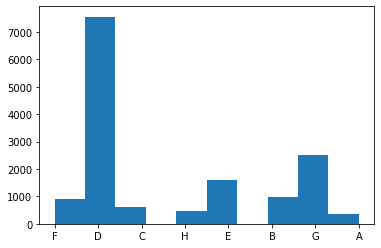

In [102]:
plt.hist(data_train["category"])
plt.show()

### plot

<function matplotlib.pyplot.show(close=None, block=None)>

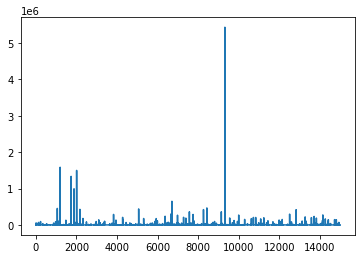

In [103]:
plt.plot(data_train["adview"])
plt.show

In [104]:
# removing video with adview more than 2000000 as an outlier
data_train = data_train[data_train["adview"] < 2000000]

### heatmap

C:\Users\codet\AppData\Local\Temp\ipykernel_25436\247689943.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


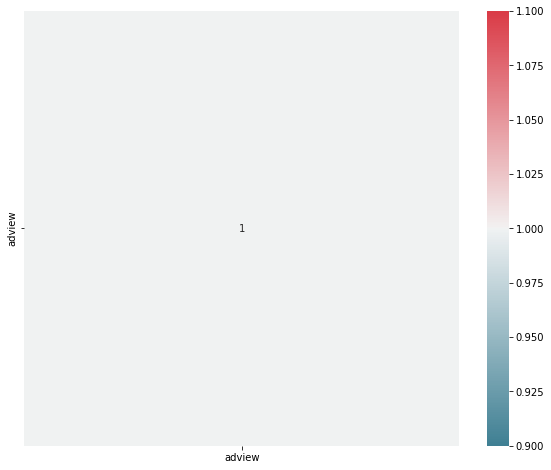

In [105]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), 
square=True, ax=ax, annot=True)
plt.show()

# Pre-processing

## cleaning the dataset by removing missing values and other things

In [106]:
# removing charecter "F" present in data
data_train = data_train[data_train.views != 'F']
data_train = data_train[data_train.likes != 'F']
data_train = data_train[data_train.dislikes != 'F']
data_train = data_train[data_train.comment != 'F']

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [107]:
# assigning each category with a number for a category feature.

category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data_train["category"]=data_train["category"].map(category)

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


# Feature engineering

## Trasform attributes into numerical values and other necessary transformations

In [108]:
# convert values for integers for views, likes, comments, dislikes and adviews
data_train["views"] = pd.to_numeric(data_train["views"])
data_train["comment"] = pd.to_numeric(data_train["comment"])
data_train["likes"] = pd.to_numeric(data_train["likes"])
data_train["dislikes"] = pd.to_numeric(data_train["dislikes"])
data_train["adview"] = pd.to_numeric(data_train["adview"])

column_vidid = data_train["vidid"]

In [109]:
# encoding feature like category, duration and vidid
from sklearn.preprocessing import LabelEncoder
data_train['duration'] = LabelEncoder().fit_transform(data_train['duration'])
data_train['vidid'] = LabelEncoder().fit_transform(data_train['vidid'])
data_train['published'] = LabelEncoder().fit_transform(data_train['published'])

data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9004,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [110]:
# convert time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

train = pd.read_csv("train.csv")
mp = pd.read_csv(path + "train.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_train["duration"]=time1
data_train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9004,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


# training the model

## split_train_test the dataset in X and y

In [111]:
# split data
Y_train = pd.DataFrame(data = data_train.iloc[:, 1].values, columns = ['target'])
data_train = data_train.drop(["adview"], axis=1)
data_train = data_train.drop(["vidid"], axis=1)

data_train.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_train, Y_train, test_size=0.2, random_state=42)

X_train.shape

(11708, 7)

## normalization

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

X_train.mean()

0.1739096800320488

### creating system to calculate the error for different models

In [114]:
# Evaluation Metrics

from sklearn import metrics

def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

### using different types of model and comparing the error with each other

In [115]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.378005824529
Mean Squared Error: 835663131.1210335
Root Mean Squared Error: 28907.83857573986


In [116]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\codet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824529
Mean Squared Error: 835663131.1210335
Root Mean Squared Error: 28907.83857573986


In [117]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2696.8148907103823
Mean Squared Error: 899012854.0519125
Root Mean Squared Error: 29983.543053680507


In [118]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2

random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\codet\AppData\Local\Temp\ipykernel_25436\3412941453.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3293.689899289081
Mean Squared Error: 618928054.169574
Root Mean Squared Error: 24878.26469369546


In [119]:
#Decision Tree Regressor

# Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

dtc = DecisionTreeRegressor()

# fit
dtc.fit(X_train, y_train)

# predict
y_pred = dtc.predict(X_test)

# f1 score
score = f1_score(y_pred, y_test,pos_label='positive',average='micro')

print ("Decision Tree F1 score: {:.2f}".format(score))


Mean Absolute Error: 2741.58162568306
Mean Squared Error: 906049108.4334016
Root Mean Squared Error: 30100.649634740468
Decision Tree F1 score: 0.23


C:\Users\codet\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


### saving the most accurate model

In [120]:
#Saving Scikitlearn models

import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [121]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2301912568306011


# using trained model for prediction

In [122]:
path = ""
data_test = pd.read_csv(path + "test.csv")

data_test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [123]:
data_test.shape

(8764, 8)

In [124]:
import pydotplus
from sklearn.tree import DecisionTreeRegressor
from sklearn import datasets
iris = datasets.load_iris()
features = iris.data
target = iris.target
print(features)
print(target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [125]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_test, y_test)

DecisionTreeRegressor()

In [126]:
#Predicting the Test Set Results
y_pred = decision_tree.predict(X_test)              
print(y_pred)

[ 5.  2.  5. ...  1.  2. 11.]


In [127]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1228,    0,    0, ...,    0,    0,    0],
       [   0,  437,    0, ...,    0,    0,    0],
       [   0,    0,  231, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,    1,    0,    0],
       [   0,    0,    0, ...,    0,    1,    0],
       [   0,    0,    0, ...,    0,    0,    1]], dtype=int64)

In [128]:
from sklearn import tree
X = iris.data
y = iris.target
model = dtc.fit(X, y)

In [129]:
text_representation = tree.export_text(dtc)
print(text_representation)

|--- feature_3 <= 0.80
|   |--- value: [0.00]
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- value: [1.00]
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- value: [2.00]
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- value: [2.00]
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_2 <= 5.45
|   |   |   |   |   |--- value: [1.00]
|   |   |   |   |--- feature_2 >  5.45
|   |   |   |   |   |--- value: [2.00]
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- value: [2.00]
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- value: [1.00]
|   |   |--- feature_2 >  4.85
|   |   |   |--- value: [2.00]



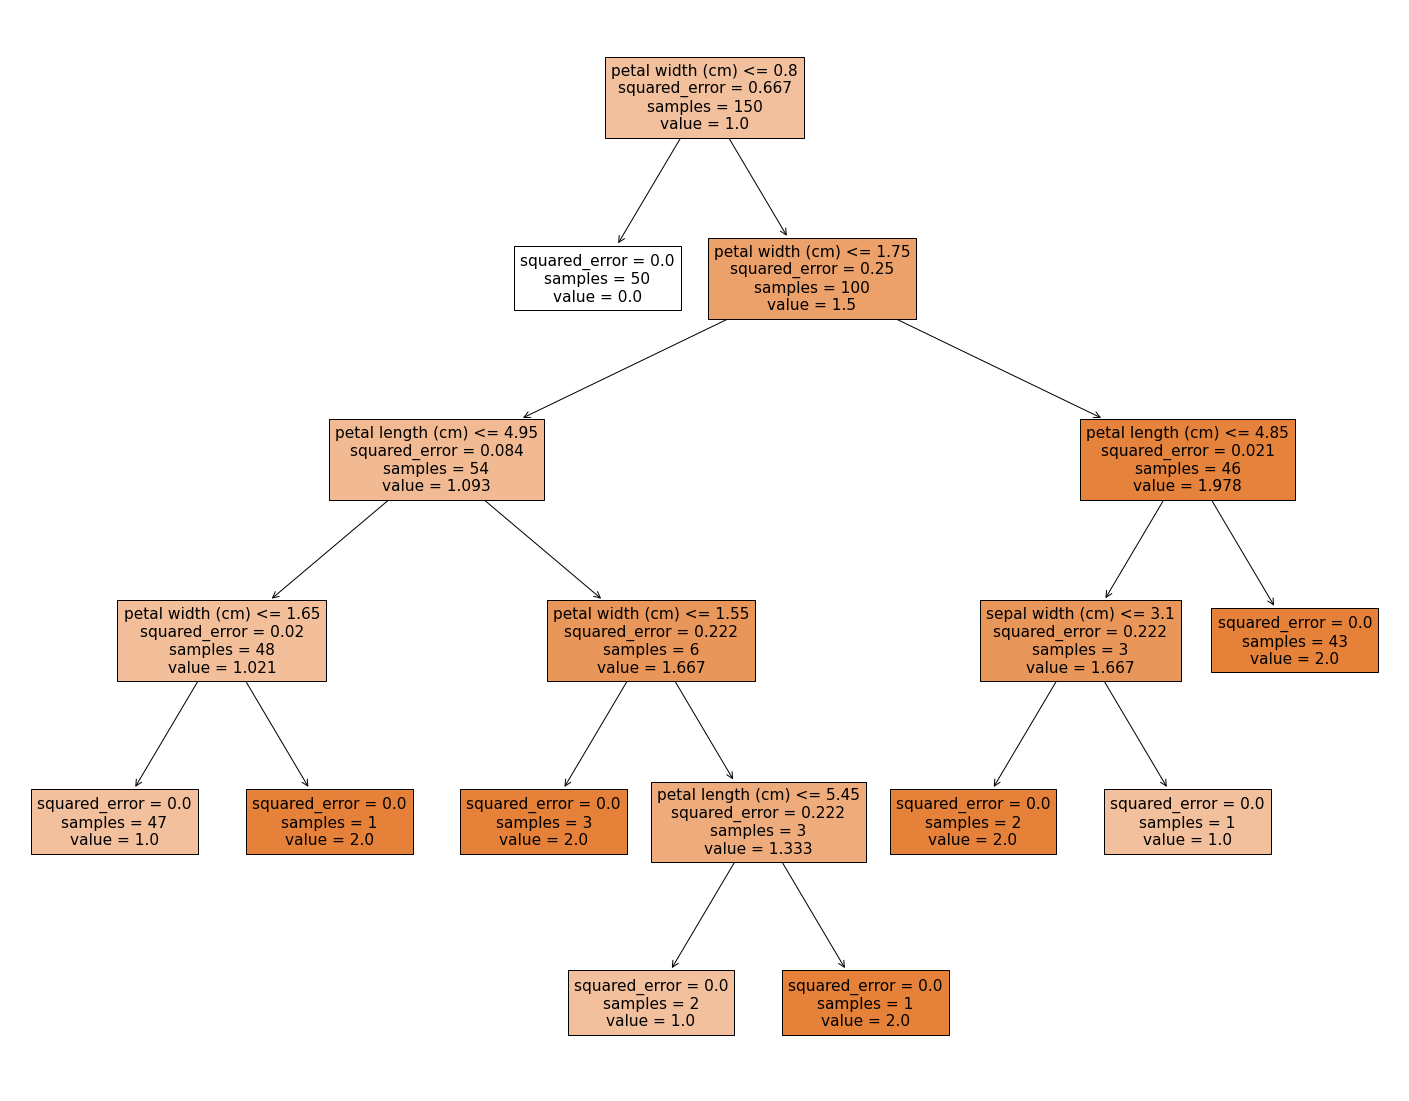

In [130]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtc, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

In [131]:
fig.savefig("decistion_tree.png")

In [132]:
prediction = decision_tree.predict(X_test)
print(prediction)

[ 5.  2.  5. ...  1.  2. 11.]


In [133]:
regressor = joblib.load("decisiontree_youtubeadview.pkl")
prediction = decision_tree.predict(X_test)

In [134]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(prediction, columns=['predictions']).to_csv('prediction.csv')

PermissionError: [Errno 13] Permission denied: 'prediction.csv'

# if it is required to preprocess the dataset we need to go for below step's

In [ ]:
# removing charecter "F" present in data
data_test = data_test[data_test.views != 'F']
data_test = data_test[data_test.likes != 'F']
data_test = data_test[data_test.dislikes != 'F']
data_test = data_test[data_test.comment != 'F']

data_test.head()

In [ ]:
# assigning each category with a number for a category feature.
category = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'H':8}
data_test["category"]=data_test["category"].map(category)

data_test.head()

In [ ]:
# convert values for integers for views, likes, comments, dislikes
data_test["views"] = pd.to_numeric(data_test["views"])
data_test["comment"] = pd.to_numeric(data_test["comment"])
data_test["likes"] = pd.to_numeric(data_test["likes"])
data_test["dislikes"] = pd.to_numeric(data_test["dislikes"])

column_vidid = data_test["vidid"]

data_test.head()

In [ ]:
# encoding feature like category, duration and vidid
from sklearn.preprocessing import LabelEncoder
data_test['duration'] = LabelEncoder().fit_transform(data_test['duration'])
data_test['vidid'] = LabelEncoder().fit_transform(data_test['vidid'])
data_test['published'] = LabelEncoder().fit_transform(data_test['published'])

data_test.head()

In [ ]:
# convert time_in_sec for duration
import datetime
import time
def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            mm+=i
        else:
            if(i=="H"):
                h = mm
                mm = ''
            elif(i == "M"):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    bp = h+':'+m+':'+s
    return bp

test = pd.read_csv("test.csv")
mp = pd.read_csv(path + "test.csv")["duration"]
time = mp.apply(checki)

def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

data_test["duration"]=time1
data_test.head()

In [ ]:
model = joblib.load("decisiontree_youtubeadview.pkl")